In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from scipy.stats.kde import gaussian_kde  # ,multivariate_normal
from scipy.stats import norm
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN,Birch,KMeans,estimate_bandwidth,MeanShift

55
12
6


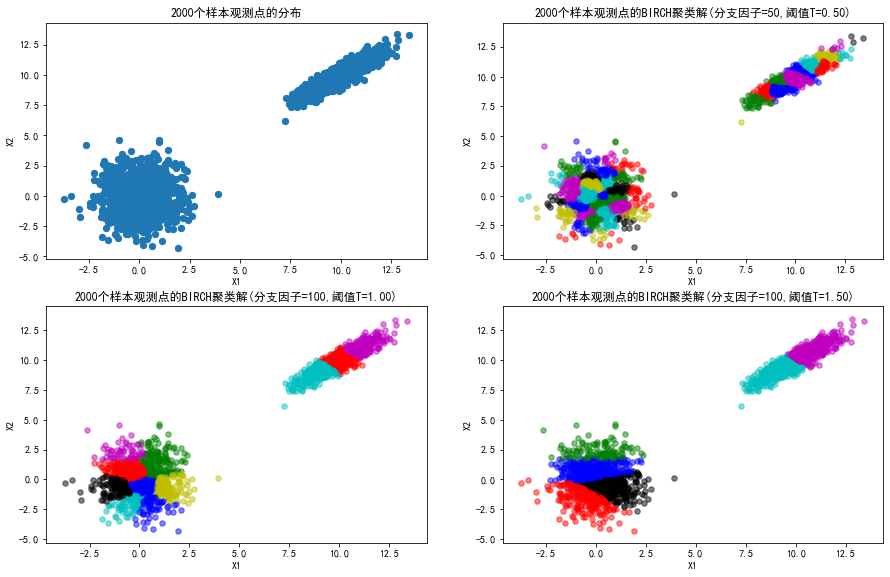

In [2]:
fig=plt.figure(figsize=(15,20))
np.random.seed(12345)
N1,N2=1000,1000
mu1,cov1=[0,0],[[1,0],[0,2]]
set1= np.random.multivariate_normal(mu1,cov1,N1)  #set1 = multivariate_normal(mean=mu1, cov=cov1,N1)
mu2,cov2=[10,10],[[1,0.9],[0.9,1]]
set2=np.random.multivariate_normal(mu2,cov2,N2)  #set2 = multivariate_normal(mean=mu2, cov=cov2,N2)

X=np.vstack([set1,set2])
ax=plt.subplot(421)
ax.scatter(X[:,0],X[:,1],s=40)
ax.set_title("%d个样本观测点的分布"%(N1+N2))
ax.set_xlabel("X1")
ax.set_ylabel("X2")

B=[50,100,100]
T=[0.5,1,1.5]
i=1
colors=cycle('bgrcmyk')
for b,tau in zip(B,T):
    Bi=Birch(n_clusters=None,threshold=tau,branching_factor=b)
    Bi.fit(X)
    labels=np.unique(Bi.labels_)
    print(len(labels))
    i+=1
    ax=plt.subplot(4,2,i)
    for color,k in zip(colors,labels):
        ax.scatter(X[Bi.labels_==k,0],X[Bi.labels_==k,1],c=color,s=30,alpha=0.5) 
    ax.set_title("%d个样本观测点的BIRCH聚类解(分支因子=%d,阈值T=%.2f)"%(N1+N2,b,tau))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")


代码说明：
（1）第16，17行：分别指定BIRCH聚类中的分支因子B和叶节点允许的最大“半径”T的不同取值。
（2）第20至31行：利用for循环进行3种不同参数下的BIRCH聚类：B=50,T=0.5;B=100,T=1;B=100,T=1.5。


Text(0, 0.5, 'X2')

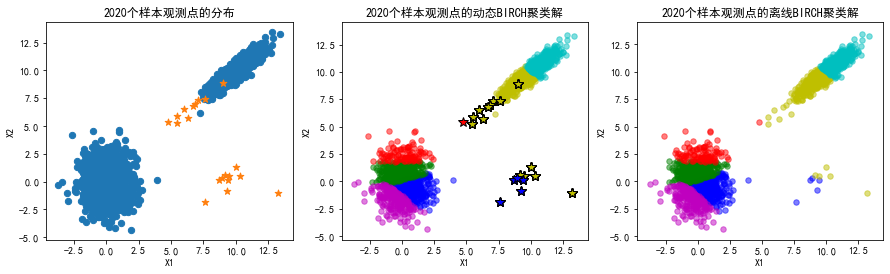

In [3]:
np.random.seed(12345)   #新增数据
mu3,cov3,N3=[7,7],[[1,0.9],[0.9,1]],10
mu4,cov4,N4=[10,0],[[1,0],[0,1]],10
NewX=np.random.multivariate_normal(mu3,cov3,N3)
NewX=np.vstack((NewX,np.random.multivariate_normal(mu4,cov4,N4)))
fig=plt.figure(figsize=(15,4))
ax=plt.subplot(131)
ax.scatter(X[:,0],X[:,1],s=40)
ax.scatter(NewX[:,0],NewX[:,1],marker='*',s=50)
ax.set_title("%d个样本观测点的分布"%(N1+N2+N3+N4))
ax.set_xlabel("X1")
ax.set_ylabel("X2")

b=100 
tau=1.5
Bi=Birch(n_clusters=None,threshold=tau,branching_factor=b)
ylabel=Bi.fit_predict(X)
labels=np.unique(Bi.labels_)
ax=plt.subplot(132)
colors ='bgrmyck'
for color,k in zip(colors,labels):
        ax.scatter(X[Bi.labels_==k,0],X[Bi.labels_==k,1],c=color,s=30,alpha=0.5)  
Bi.partial_fit(NewX)
for i,k in enumerate(Bi.labels_):
    ax.plot(NewX[Bi.labels_==k,0],NewX[Bi.labels_==k,1], '*', markerfacecolor=colors[k],
            markeredgecolor='k', markersize=10)
ax.set_title("%d个样本观测点的动态BIRCH聚类解"%(N1+N2+N3+N4))
ax.set_xlabel("X1")
ax.set_ylabel("X2")

D=np.vstack((X,NewX))  #离线更新
Bi.fit(D)
ax=plt.subplot(133)
for color,k in zip(colors,labels):
        ax.scatter(D[Bi.labels_==k,0],D[Bi.labels_==k,1],c=color,s=30,alpha=0.5)  
ax.set_title("%d个样本观测点的离线BIRCH聚类解"%(N1+N2+N3+N4))
ax.set_xlabel("X1")
ax.set_ylabel("X2")



代码说明：
（1）第14，15行：指定BIRCH聚类的分支因子B和阈值T。
（2）第16行：利用函数Birch()定义BIRCH聚类对象。
（3）第17行：基于定义的BIRCH对象对聚类数据进行聚类，并获得各样本观测的聚类解。完成数据聚类。
（4）第21，22行：数据聚类的可视化。不同小类以不同颜色表示。
（5）第23行：利用BIRCH对象的partial_fit()方法对新数据进行动态聚类。
（6）第24至26行：将新数据的聚类解添加到图中

Text(0, 0.5, 'X2')

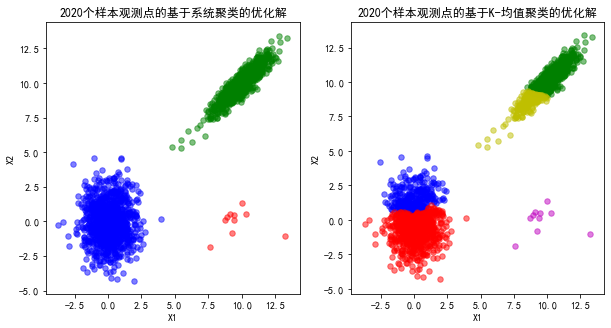

In [4]:
Bi=Birch(n_clusters=3)  #默认采用系统聚类且默认聚成3类
Bi.fit(D)
labels=np.unique(Bi.labels_)
colors ='bgrmyck'
fig=plt.figure(figsize=(10,5))
ax=plt.subplot(121)
for color,k in zip(colors,labels):
        ax.scatter(D[Bi.labels_==k,0],D[Bi.labels_==k,1],c=color,s=30,alpha=0.5)
ax.set_title("%d个样本观测点的基于系统聚类的优化解"%(N1+N2+N3+N4))
ax.set_xlabel("X1")
ax.set_ylabel("X2")

KM=KMeans(random_state=1,n_clusters=5)
Bi=Birch(n_clusters=KM)
Bi.fit(D)
labels=np.unique(Bi.labels_)
ax=plt.subplot(122)
for color,k in zip(colors,labels):
        ax.scatter(D[Bi.labels_==k,0],D[Bi.labels_==k,1],c=color,s=30,alpha=0.5)
ax.set_title("%d个样本观测点的基于K-均值聚类的优化解"%(N1+N2+N3+N4))
ax.set_xlabel("X1")
ax.set_ylabel("X2")


代码说明：
（1）第1，2行：利用函数Birch()指定n_clusters=3，表示采用系统聚类优化聚类解，且聚类数目K=3。拟合全体数据，模拟实现离线优化。
（2）第7至11行：可视化基于系统聚类优化的优化解。
（3）第13行：定义K-均值聚类对象，指定聚类数目K=5。
（4）第14行：利用函数Birch()指定n_clusters为一个聚类对象，表示依据聚类对象优化聚类解。
（5）第18至22：可视化基于K-均值聚类优化的优化解。
